In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv("archive/Minimum Wage Data.csv", encoding="latin")
# df.to_csv("archive/minwage.csv", encoding="utf-8")
df = pd.read_csv("archive/minwage.csv")
df.tail()
df.shape

(2862, 16)

In [3]:
gb = df.groupby("State")
gb.get_group("Alabama").set_index("Year").head()

,Unnamed: 0,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
Year,,,,,,,,,,,,,,,
1968,0,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
1969,54,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
1970,108,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN
1971,162,Alabama,0.0,0.0,1.30,8.30,1.30,8.30,40.5,...,0.0,0.0,0.0,0.0,NaN
1972,216,Alabama,0.0,0.0,1.60,9.90,1.60,9.90,41.8,...,0.0,0.0,0.0,0.0,NaN


In [4]:
act_min_wage = pd.DataFrame()
for name, group in df.groupby("State"):
    #print(name)
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["State.Minimum.Wage.2020.Dollars"]].rename(columns={"State.Minimum.Wage.2020.Dollars":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["State.Minimum.Wage.2020.Dollars"]].rename(columns={"State.Minimum.Wage.2020.Dollars":name}))
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.61,3.48,1.16,12.26,7.43,10.41,9.29,9.29,0.0,...,0.0,0.00,0.0,7.43,10.41,0.0,11.89,7.43,9.29,8.92
1969,0.0,14.80,3.30,1.10,11.63,7.05,9.87,8.81,8.81,0.0,...,0.0,0.00,0.0,7.05,9.87,0.0,11.28,7.05,8.81,8.46
1970,0.0,14.00,3.12,7.33,11.00,6.67,10.67,8.33,10.67,0.0,...,0.0,0.00,0.0,6.67,10.67,0.0,10.67,6.67,8.67,8.67
1971,0.0,13.41,2.99,7.03,10.54,6.39,10.22,7.98,10.22,0.0,...,0.0,0.00,0.0,6.39,10.22,0.0,10.22,6.39,8.30,8.30
1972,0.0,12.99,2.90,7.43,10.21,6.19,11.45,9.90,9.90,0.0,...,0.0,8.66,0.0,7.43,9.90,0.0,9.90,7.43,8.97,9.28


In [5]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.0,9.917736,2.917358,7.139245,9.101132,6.881698,9.212830,7.818679,8.919245,2.415283,...,0.0,5.816038,5.531509,7.079245,9.057358,6.163019,8.826038,7.486226,7.914528,5.313208
std,0.0,1.852213,4.102247,1.459132,1.418712,1.921086,1.106907,1.307834,1.932959,3.882305,...,0.0,2.240879,3.281419,0.824707,1.093119,2.749633,2.147933,0.866017,0.778113,2.004899
min,0.0,7.620000,0.000000,1.100000,6.630000,3.970000,7.040000,4.550000,5.690000,0.000000,...,0.0,0.000000,0.000000,4.950000,7.030000,0.000000,4.550000,5.770000,6.630000,2.340000
25%,0.0,8.590000,0.000000,6.780000,8.000000,5.250000,8.200000,7.320000,7.420000,0.000000,...,0.0,4.990000,4.630000,6.610000,8.060000,6.250000,7.610000,6.850000,7.320000,3.500000
50%,0.0,9.260000,0.000000,7.210000,9.010000,6.670000,9.430000,8.170000,8.840000,0.000000,...,0.0,6.360000,6.040000,7.220000,9.240000,7.210000,9.700000,7.370000,7.810000,5.550000
75%,0.0,10.510000,8.290000,7.740000,9.710000,8.430000,9.870000,8.620000,9.600000,8.210000,...,0.0,7.350000,7.910000,7.660000,9.820000,7.810000,10.180000,7.930000,8.340000,6.820000
max,0.0,15.610000,12.140000,10.000000,13.000000,12.140000,11.450000,9.900000,14.160000,8.790000,...,0.0,8.660000,10.620000,8.600000,11.090000,9.090000,13.660000,9.430000,9.980000,9.280000


In [6]:
issue_df = df[df['State.Minimum.Wage.2020.Dollars']==0]
issue_df.head()
issue_df['State'].unique()
act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


<AxesSubplot:xlabel='Year'>

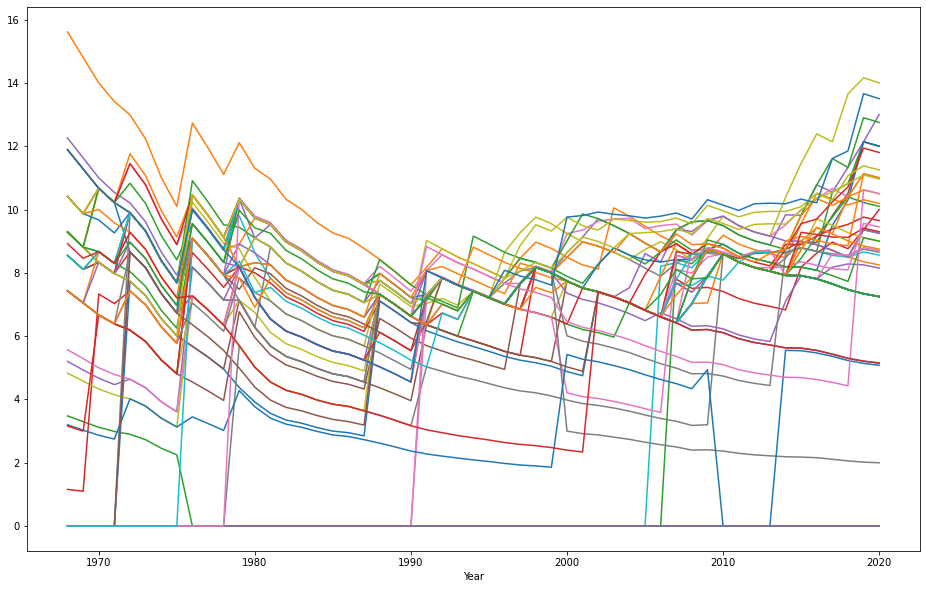

In [52]:
act_min_wage.plot(legend=False, figsize=(16,10))

In [53]:
# act_min_wage=act_min_wage.replace(0, np.NaN).dropna(axis=1)
# act_min_wage.to_dict()

In [54]:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


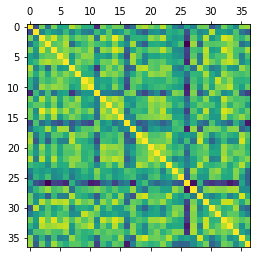

In [55]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)
plt.show()

In [6]:
import requests
web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
dfs = pd.read_html(web.text)

In [7]:
for df in dfs:
    print(df.head())

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [8]:
state_abbv = dfs[0]
state_abbv.to_csv("archive/state_abbv.csv")

In [10]:
dfs[1]

,Territory/Associate,Abbreviation,Postal Code
0,American Samoa,NaN,AS
1,Guam,Guam,GU
2,Marshall Islands,NaN,MH
3,Micronesia,NaN,FM
4,Northern Mariana Islands,NaN,MP
5,Palau,NaN,PW
6,Puerto Rico,P.R.,PR
7,Virgin Islands,NaN,VI
